In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("train_coursework.csv")

In [3]:
df

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,bd6df98cc746
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,e6197a1334b3
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,b922a2a5f687
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,cb1ed2c3ca95


In [4]:
df["label"].value_counts()

other                       5036
needs_troubleshooting       4305
card_queries_or_issues      2598
top_up_queries_or_issues    1684
Other                         21
Card_queries_or_issues        12
Top_up_queries_or_issues      11
Needs_troubleshooting          7
Name: label, dtype: int64

In [5]:
df["label"] = df["label"].str.lower()

In [6]:
df["label"].value_counts()

other                       5057
needs_troubleshooting       4312
card_queries_or_issues      2610
top_up_queries_or_issues    1695
Name: label, dtype: int64

In [7]:
df['label'] = df.groupby(['text'])['label'].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [8]:
df.drop_duplicates(subset=["text"],keep="first",inplace=True)

In [9]:
df["query_index"].value_counts()

526cd7f17526    1
be7f630d23e6    1
c76d0689bc38    1
7b7132a101a3    1
048df7723d23    1
               ..
c2ff064df31a    1
1b5c41964834    1
57be586d1da7    1
c5e8492cfaf5    1
f7e5a9b88449    1
Name: query_index, Length: 13084, dtype: int64

In [10]:
dataset=df[["text","label"]]

In [13]:
dataset.reset_index(drop=True)

,text,label
0,Can I automatically top-up when traveling?,top_up_queries_or_issues
1,What kind of fiat currency can I used for hold...,other
2,I did not get the item I ordered. How should ...,other
3,Freeze my account it's been hacked.,needs_troubleshooting
4,is there a reason that my payment didnt go thr...,other
...,...,...
13079,Can you tell me what the disposable cards are ...,card_queries_or_issues
13080,The ATM won't give me my card back. I need it ...,card_queries_or_issues
13081,Can you please tell me why my card payments ar...,card_queries_or_issues
13082,The rate for a currency exchange was wrong whe...,needs_troubleshooting


In [11]:
#dataset.to_csv("final_project_cleaned.csv",index=False)

In [11]:
df[df["label"].isnull()==True]

,text,label,query_index


In [12]:
#df[df["text"]=="I can not find my card pin."]

In [13]:
df

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d
...,...,...,...
14190,Can you tell me what the disposable cards are ...,card_queries_or_issues,bd6df98cc746
14191,The ATM won't give me my card back. I need it ...,card_queries_or_issues,e6197a1334b3
14192,Can you please tell me why my card payments ar...,card_queries_or_issues,b922a2a5f687
14193,The rate for a currency exchange was wrong whe...,needs_troubleshooting,cb1ed2c3ca95


In [14]:
df["label"].value_counts()

other                       4803
needs_troubleshooting       4154
card_queries_or_issues      2495
top_up_queries_or_issues    1632
Name: label, dtype: int64

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


# Load the dataset


# Preprocess the text data
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

df['text'] = df['text'].apply(preprocess_text)

# Split the dataset into training and testing sets


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Perform oversampling on the training set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)







In [30]:
# Define a pipeline for text classification
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(C=10, penalty='l2'))])

# Train the classifier on the resampled training data
text_clf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set
y_pred = text_clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.84      0.89      0.87       501
   needs_troubleshooting       0.87      0.87      0.87       823
                   other       0.88      0.85      0.86       974
top_up_queries_or_issues       0.94      0.94      0.94       319

                accuracy                           0.88      2617
               macro avg       0.88      0.89      0.88      2617
            weighted avg       0.88      0.88      0.88      2617



/home/ajay/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the dataset


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Perform oversampling on the training set
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train.to_numpy().reshape(-1, 1), y_train)

# Define a pipeline for text classification
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Train the classifier on the resampled training data
text_clf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set
y_pred = text_clf.predict(X_test)

# Evaluate the classifier performance
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.90      0.86       501
   needs_troubleshooting       0.86      0.87      0.87       823
                   other       0.89      0.84      0.86       974
top_up_queries_or_issues       0.96      0.94      0.95       319

                accuracy                           0.88      2617
               macro avg       0.88      0.89      0.89      2617
            weighted avg       0.88      0.88      0.88      2617



/home/ajay/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define a pipeline for text classification
text_clf_lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Define the hyperparameters to search over
param_grid_lr = {'clf__C': [0.01, 0.1, 1, 10], 'clf__penalty': ['l1', 'l2']}

# Use GridSearchCV to search over the hyperparameters
grid_search_lr = GridSearchCV(text_clf_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1)

# Train the classifier on the resampled training data
grid_search_lr.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

/home/ajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, se

Best Hyperparameters:  {'clf__C': 10, 'clf__penalty': 'l2'}
Best Score:  0.9125100479145942


/home/ajay/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification using Naive Bayes
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Train the Naive Bayes classifier on the resampled training data
text_clf_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using Naive Bayes classifier
y_pred_nb = text_clf_nb.predict(X_test)

# Evaluate the Naive Bayes classifier performance
print(classification_report(y_test, y_pred_nb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.82      0.84      0.83       501
   needs_troubleshooting       0.80      0.86      0.83       823
                   other       0.87      0.76      0.81       974
top_up_queries_or_issues       0.81      0.93      0.86       319

                accuracy                           0.83      2617
               macro avg       0.83      0.85      0.84      2617
            weighted avg       0.83      0.83      0.83      2617



In [78]:
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification using Naive Bayes
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB(alpha=0.1))])

# Train the Naive Bayes classifier on the resampled training data
text_clf_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using Naive Bayes classifier
y_pred_nb = text_clf_nb.predict(X_test)

# Evaluate the Naive Bayes classifier performance
print(classification_report(y_test, y_pred_nb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.83      0.83      0.83       501
   needs_troubleshooting       0.81      0.86      0.83       823
                   other       0.86      0.78      0.82       974
top_up_queries_or_issues       0.81      0.90      0.85       319

                accuracy                           0.83      2617
               macro avg       0.83      0.84      0.83      2617
            weighted avg       0.83      0.83      0.83      2617



In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define a pipeline for text classification
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Define the hyperparameters to search over
param_grid_nb = {'clf__alpha': [0.01, 0.1, 1, 10]}

# Use GridSearchCV to search over the hyperparameters
grid_search_nb = GridSearchCV(text_clf_nb, param_grid=param_grid_nb, cv=5, n_jobs=-1)

# Train the classifier on the resampled training data
grid_search_nb.fit(X_train_resampled.ravel(), y_train_resampled)

# Print the best hyperparameters and the best score
print("Best Hyperparameters: ", grid_search_nb.best_params_)
print("Best Score: ", grid_search_nb.best_score_)

Best Hyperparameters:  {'clf__alpha': 0.1}
Best Score:  0.8694831301587465


In [86]:
from sklearn.model_selection import GridSearchCV

# Define a pipeline for text classification using SVM
text_clf_svm = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

# Define the parameter grid for GridSearchCV
param_grid = {
    'clf__kernel': ['linear', 'rbf', 'sigmoid'],
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': ['scale', 'auto']
}

# Create a GridSearchCV object with the specified hyperparameters
grid_search = GridSearchCV(text_clf_svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/ajay/.local/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py", line 2133, in fit_transform
    X = super().fit_transform(raw_documents)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py", line 1388, in fit_transform
    vocabulary, X = self._count_vocab(raw_documents, self.fixed_vocabulary_)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py", line 1275, in _count_vocab
    for feature in analyze(doc):
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py", line 111, in _analyze
    doc = preprocessor(doc)
  File "/home/ajay/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py", line 69, in _preprocess
    doc = doc.lower()
AttributeError: 'numpy.ndarray' object has no attribute 'lower'


In [87]:
from sklearn.svm import SVC

# Define a pipeline for text classification using SVM
text_clf_svm = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(kernel='linear'))])

# Train the SVM classifier on the resampled training data
text_clf_svm.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using SVM classifier
y_pred_svm = text_clf_svm.predict(X_test)

# Evaluate the SVM classifier performance
print(classification_report(y_test, y_pred_svm))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.82      0.91      0.86       501
   needs_troubleshooting       0.87      0.88      0.87       823
                   other       0.90      0.84      0.87       974
top_up_queries_or_issues       0.94      0.94      0.94       319

                accuracy                           0.88      2617
               macro avg       0.88      0.89      0.89      2617
            weighted avg       0.88      0.88      0.88      2617



In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define a pipeline for text classification using random forest
text_clf_rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100))])

# Train the random forest classifier on the resampled training data
text_clf_rf.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using random forest classifier
y_pred_rf = text_clf_rf.predict(X_test)

# Evaluate the random forest classifier performance
print(classification_report(y_test, y_pred_rf))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.87      0.92      0.89       501
   needs_troubleshooting       0.93      0.91      0.92       823
                   other       0.91      0.91      0.91       974
top_up_queries_or_issues       0.96      0.94      0.95       319

                accuracy                           0.91      2617
               macro avg       0.92      0.92      0.92      2617
            weighted avg       0.91      0.91      0.91      2617



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

# Define a pipeline for text classification using gradient boosting
text_clf_gb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', GradientBoostingClassifier())])

# Train the gradient boosting classifier on the resampled training data
text_clf_gb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using gradient boosting classifier
y_pred_gb = text_clf_gb.predict(X_test)

# Evaluate the gradient boosting classifier performance
print(classification_report(y_test, y_pred_gb))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.74      0.91      0.82       501
   needs_troubleshooting       0.85      0.76      0.80       823
                   other       0.83      0.80      0.81       974
top_up_queries_or_issues       0.93      0.92      0.93       319

                accuracy                           0.82      2617
               macro avg       0.84      0.85      0.84      2617
            weighted avg       0.83      0.82      0.82      2617



In [23]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Define a pipeline for text classification using AdaBoost
text_clf_ab = Pipeline([('tfidf', TfidfVectorizer()), ('clf', AdaBoostClassifier())])

# Train the AdaBoost classifier on the resampled training data
text_clf_ab.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using AdaBoost classifier
y_pred_ab = text_clf_ab.predict(X_test)

# Evaluate the AdaBoost classifier performance
print(classification_report(y_test, y_pred_ab))

                          precision    recall  f1-score   support

  card_queries_or_issues       0.64      0.86      0.73       501
   needs_troubleshooting       0.62      0.25      0.36       823
                   other       0.49      0.75      0.59       974
top_up_queries_or_issues       0.67      0.27      0.39       319

                accuracy                           0.56      2617
               macro avg       0.61      0.53      0.52      2617
            weighted avg       0.58      0.56      0.52      2617



In [22]:
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer()), ('clf', XGBClassifier())])

# Train the XGBoost classifier on the resampled training data
text_clf_xgb.fit(X_train_resampled.ravel(), y_train_resampled)

# Predict on the testing set using XGBoost classifier
y_pred_xgb = text_clf_xgb.predict(X_test)

# Evaluate the XGBoost classifier performance
print(classification_report(y_test, y_pred_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['card_queries_or_issues' 'needs_troubleshooting' 'other'
 'top_up_queries_or_issues']

In [18]:
#pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 232.5 kB/s eta 0:00:00m eta 0:00:010:00:47
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 457.3 kB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 360.3 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 560.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 178.2 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 749.5 kB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 807.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 485.1 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 332.2 kB/s eta 0:00:

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_resampled.ravel())
X_train_seq = tokenizer.texts_to_sequences(X_train_resampled.ravel())
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to same length
max_len = max(len(seq) for seq in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64))
model_rnn.add(Dense(units=64, activation='relu'))
model_rnn.add(Dense(units=len(df['label'].unique()), activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train RNN model
model_rnn.fit(X_train_pad, y_train_resampled, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate RNN model on test set
test_loss, test_acc = model_rnn.evaluate(X_test_pad, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Make predictions on test set
y_pred = model_rnn.predict(X_test_pad)
y_pred = y_pred.argmax(axis=1)

# Create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:', cm)


Epoch 1/5


2023-03-24 21:25:26.418637: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to int64 is not supported


UnimplementedError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/Cast' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/ajay/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/ajay/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/ajay/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/ajay/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_9182/2911336541.py", line 27, in <module>
      model_rnn.fit(X_train_pad, y_train_resampled, epochs=5, batch_size=64, validation_split=0.2)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/backend.py", line 5610, in sparse_categorical_crossentropy
      target = cast(target, "int64")
    File "/home/ajay/.local/lib/python3.8/site-packages/keras/backend.py", line 2304, in cast
      return tf.cast(x, dtype)
Node: 'sparse_categorical_crossentropy/Cast'
Cast string to int64 is not supported
	 [[{{node sparse_categorical_crossentropy/Cast}}]] [Op:__inference_train_function_3957]

In [29]:
count=0
for i in y_train_resampled:
    if i=="needs_troubleshooting":
        count+=1

In [30]:
count

3829

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 175.8 kB/s eta 0:00:001m165.1 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 2.9 MB/s eta 0:00:003.2 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#dont run this cell this was for another dataset

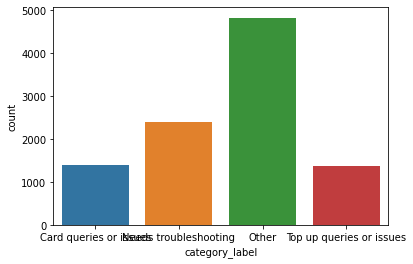

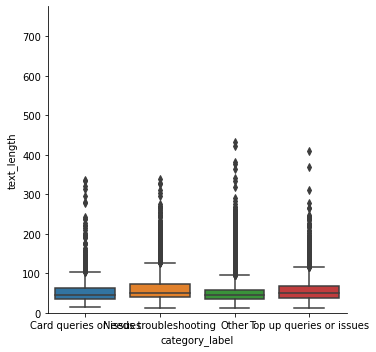

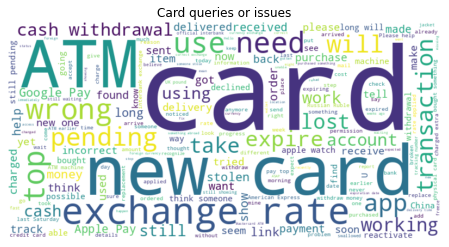

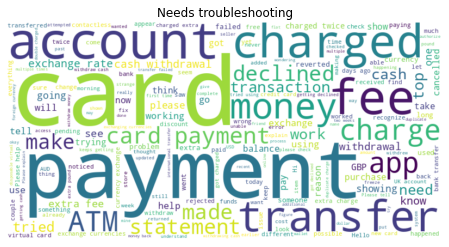

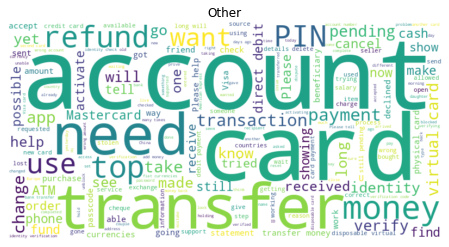

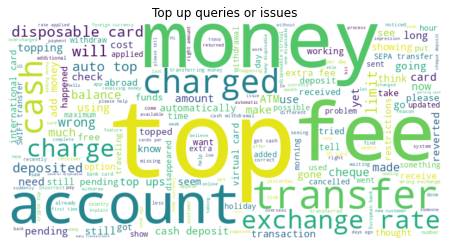

In [7]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the raw data
df = dataset

# Explore the distribution of label classes
sns.countplot(x='category_label', data=df)

# Explore the length of the text data
df['text_length'] = df['text'].apply(len)
sns.displot(df['text_length'])

# Explore the relationship between text length and label
sns.boxplot(x='category_label', y='text_length', data=df)

# Explore the most common words in each label class
for label in df['category_label'].unique():
    subset = df[df['category_label'] == label]
    text = subset['text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(label)
    
plt.show()

In [ ]:
pip install wordcloud